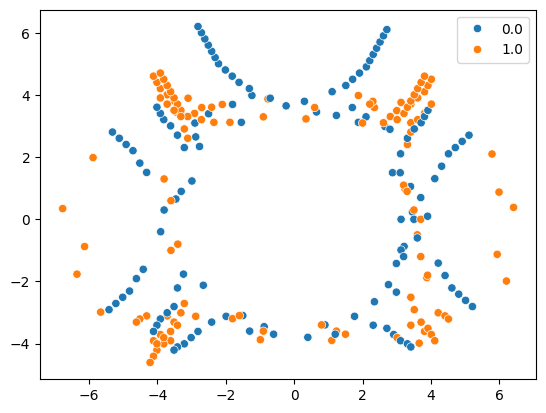

/var/folders/mh/zyvgrgvd7hxg_1ds_4_3qklc0000gn/T/ipykernel_7019/358309699.py:16: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


The accuracy is 63.89%


/var/folders/mh/zyvgrgvd7hxg_1ds_4_3qklc0000gn/T/ipykernel_7019/358309699.py:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = expanded.dot(theta)


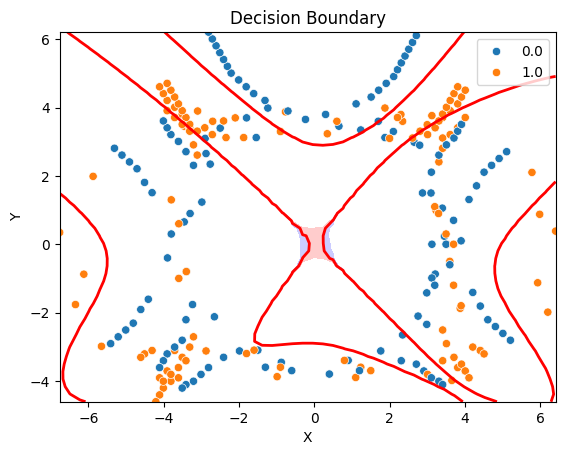

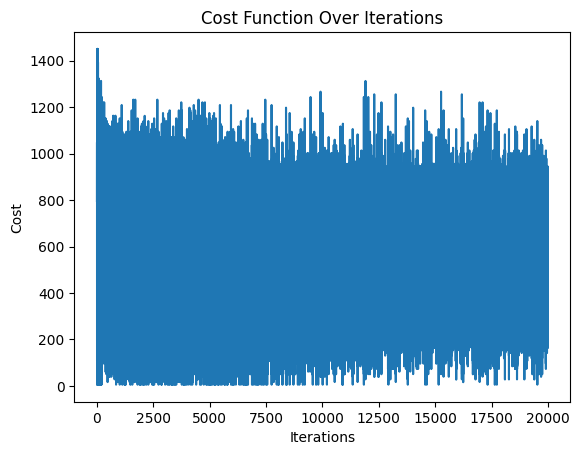

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline

# Load data
data = np.loadtxt('logistic_regression_data.csv', delimiter=',', dtype=np.float64)
X, y = data[:, :-1], data[:, -1].reshape((-1, 1))

# Visualize data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten())
plt.show()

def sigmoid(z):
    return 1/(1+np.exp(-z))

def loss(theta, X, y):
    h = sigmoid(X.dot(theta))
    # Added small epsilon to prevent log(0)
    epsilon = 1e-5
    cost = -(np.sum(y * np.log(h + epsilon) + np.sum((1-y) * np.log(1-h + epsilon)))) / len(y)
    return cost

def grad(theta, X, y):
    h = sigmoid(X.dot(theta))
    gradient = X.T.dot(h-y)/len(y)
    return gradient

def expand_feature(x1, x2, power=2):
    """Corrected feature expansion function"""
    # Start with intercept term (column of ones)
    new_x = np.ones((x1.shape[0], 1))  # Fixed np.one to np.ones
    
    # Add polynomial terms
    for i in range(1, power+1):
        for j in range(i+1):
            term = (x1**(i-j)) * (x2**j)
            new_x = np.hstack((new_x, term.reshape(-1,1)))
    return new_x

def predict(theta, X):
    return (sigmoid(X.dot(theta)) > 0.5).flatten()

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []
    
    for _ in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta -= alpha * X.T.dot(h-y)/m
        costs.append(loss(theta, X, y))
    return theta, costs

def logistic_regression(X, y, power=2, alpha=0.01, num_iters=100):
    X = expand_feature(X[:, 0], X[:, 1], power=power)
    theta = np.zeros((X.shape[1], 1), dtype=np.float64)  # Fixed np.zeroes to np.zeros
    theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

# Run logistic regression with more reasonable parameters
power, num_iters = 6, 20000  # Reduced power from 20 to prevent overfitting
predicted, theta, costs = logistic_regression(X, y, power=power, alpha=0.1, num_iters=num_iters)

# Calculate accuracy
accuracy = np.mean(predicted == y.flatten()) * 100
print(f'The accuracy is {accuracy:.2f}%')

# Create decision boundary plot
u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)

# Initialize z correctly (fixed np.zeroes to np.zeros)
z = np.zeros((len(u), len(v)))

# Calculate decision boundary
for i in range(len(u)):
    for j in range(len(v)):
        # Fixed the reshape order and dot product
        expanded = expand_feature(np.array([u[i]]), np.array([v[j]]), power=power)
        z[i,j] = expanded.dot(theta)

# Transpose z for correct orientation
z = z.T

# Plot decision boundary
plt.contour(u, v, z, levels=[0], linewidths=2, colors='red')
plt.contourf(u, v, z, levels=[-100, 0, 100], colors=['blue', 'red'], alpha=0.2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y.flatten())

plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot cost function over iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

Now let us look at reguarization    

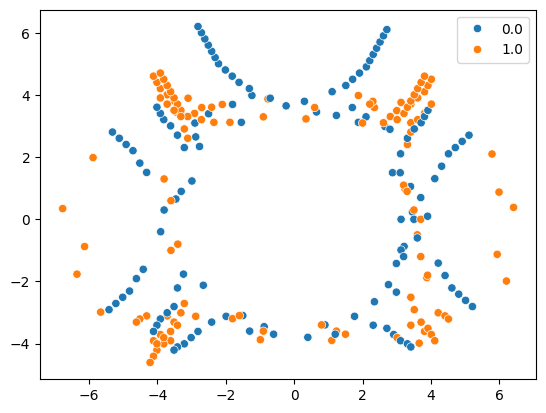

/var/folders/mh/zyvgrgvd7hxg_1ds_4_3qklc0000gn/T/ipykernel_7019/1588006093.py:16: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


The accuracy is 62.70%


/var/folders/mh/zyvgrgvd7hxg_1ds_4_3qklc0000gn/T/ipykernel_7019/1588006093.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = expanded.dot(theta)


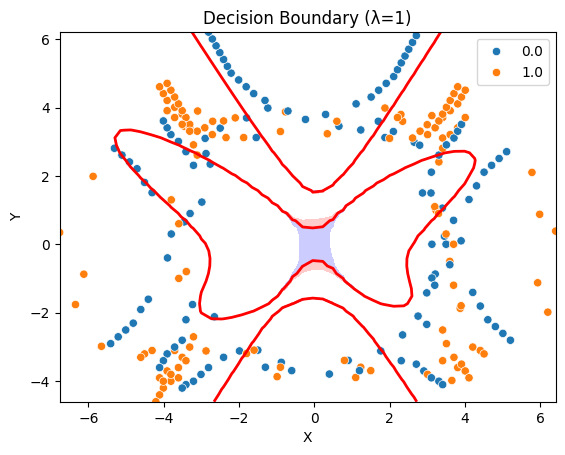

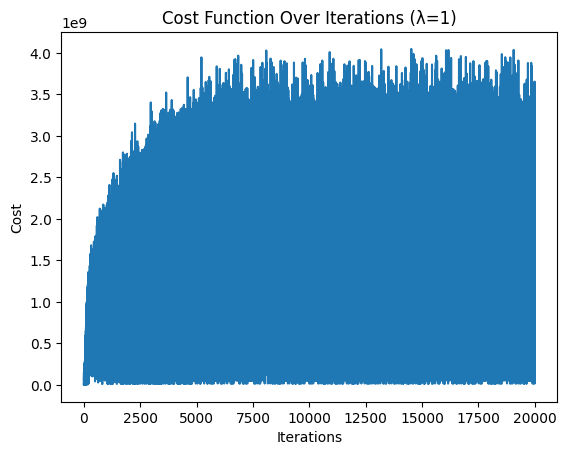

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline

# Load data
data = np.loadtxt('logistic_regression_data.csv', delimiter=',', dtype=np.float64)
X, y = data[:, :-1], data[:, -1].reshape((-1, 1))

# Visualize data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten())
plt.show()

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_reg(theta, X, y, lam=0):
    h = sigmoid(X.dot(theta))
    # Add epsilon to prevent log(0)
    epsilon = 1e-5
    theta1 = theta.copy()
    theta1[0] = 0  # Don't regularize intercept term
    cost = -(np.sum(y*np.log(h + epsilon) + np.sum((1-y)*np.log(1-h + epsilon)))/len(y) + (lam/(2*len(y))))*np.sum(theta1**2)
    return cost

def grad_reg(theta, X, y, lam=0):
    h = sigmoid(X.dot(theta))
    theta1 = theta.copy()
    theta1[0] = 0  # Don't regularize intercept term
    grad = (X.T.dot(h-y) + lam*theta1)/len(y)
    return grad

def expand_feature(x1, x2, power=2):
    """Expand features to polynomial terms"""
    # Start with intercept term (column of ones)
    new_x = np.ones((x1.shape[0], 1))
    
    # Add polynomial terms
    for i in range(1, power+1):
        for j in range(i+1):
            term = (x1**(i-j)) * (x2**j)
            new_x = np.hstack((new_x, term.reshape(-1,1)))
    return new_x

def predict(theta, X):
    return (sigmoid(X.dot(theta)) > 0.5).flatten()

def gradient_descent_reg(X, y, theta, alpha, lam=0, num_iters=100):
    m = len(y)
    costs = []
    
    for _ in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta1 = theta.copy()
        theta1[0] = 0  # Don't regularize intercept term
        theta -= alpha * (X.T.dot(h-y) + lam*theta1)/m
        costs.append(cost_reg(theta, X, y, lam))
    return theta, costs

def logistic_regression_reg(X, y, power=2, alpha=0.01, lam=0, num_iters=100):
    X = expand_feature(X[:,0], X[:,1], power=power)
    theta = np.zeros((X.shape[1], 1), dtype=np.float64)  # Initialize parameters
    theta, costs = gradient_descent_reg(X, y, theta, alpha, lam, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

# Run logistic regression with regularization
power, num_iters = 6, 20000  # Reduced power from 20 to prevent overfitting
lam = 1  # Regularization parameter
predicted, theta, costs = logistic_regression_reg(X, y, power=power, alpha=0.1, lam=lam, num_iters=num_iters)

# Calculate accuracy
accuracy = np.mean(predicted == y.flatten()) * 100
print(f'The accuracy is {accuracy:.2f}%')

# Create decision boundary plot
u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)

# Initialize z correctly
z = np.zeros((len(u), len(v)))

# Calculate decision boundary
for i in range(len(u)):
    for j in range(len(v)):
        expanded = expand_feature(np.array([u[i]]), np.array([v[j]]), power=power)
        z[i,j] = expanded.dot(theta)

# Transpose z for correct orientation
z = z.T

# Plot decision boundary
plt.contour(u, v, z, levels=[0], linewidths=2, colors='red')
plt.contourf(u, v, z, levels=[-100, 0, 100], colors=['blue', 'red'], alpha=0.2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y.flatten())

plt.title('Decision Boundary (λ={})'.format(lam))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot cost function over iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations (λ={})'.format(lam))
plt.show()